# Unsupervised Learning
<hr>

- Supervised Learning Vs Unsupervised Learning
- How to organise data without knowledge
- $k$-mean clustering

## What is Unsupervised Learning
- Given input data without any additional feedbacks
- No targets just some random features

## Clustering
- Organizing a set of objects into groups in such a way that similiar objects tend to be in the same group.

### $k$-Means Clustering
- Algorithm for clustering data based on repeatedly assigning points to clusters and updating those clusters' centers.
![kmeans](./images/k_means.PNG)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# generate some numbers
data = np.random.randn(400,2)
data[:100] += 5,5
data[100:200] += 10,10
data[200:300] += 10,5
data[400:] += 5,10

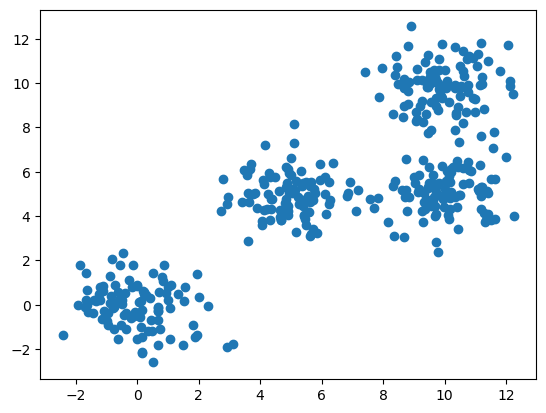

In [3]:
fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1])

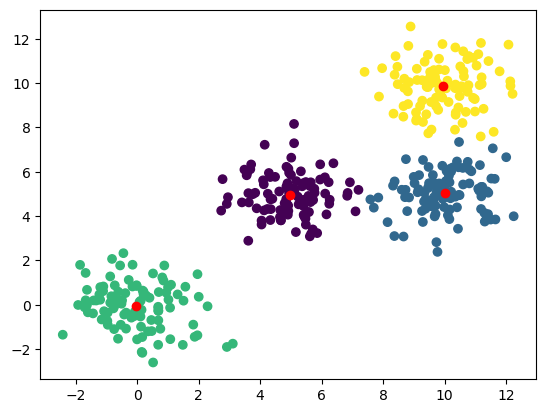

In [12]:
model = KMeans(n_clusters=4,init='random',random_state=42,max_iter=10,n_init=1)
model.fit(data)
y_pred = model.predict(data)

fig,ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

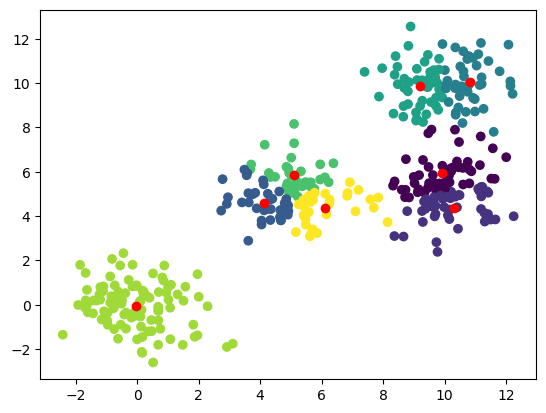

In [14]:
# assuming number of clusters is 8

model = KMeans(n_clusters=8,init='random',random_state=42,max_iter=100,n_init=1)
model.fit(data)
y_pred = model.predict(data)

fig,ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1], c=y_pred)
ax.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], c='r')

<hr>

## Choosing the right $k$

There are two widely used methods to get a good value for k.
- The elbow method
- The sihouette coefficient

<hr>

### The elbow method
- Make a chart over different k values
- If the line chart resembles an arm, then the 'elbow' is a good indication of best fit at the point.

**Different $k$ values**

In [15]:
# SSE -> Sum of squared error
SSE = []

for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    SSE.append(model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
SSE

[12582.05532050868,
 4027.1247716945386,
 1901.7574281233794,
 789.3710946454186,
 702.5813370504543,
 630.0247833640112,
 568.3353249449224,
 508.3302387128067,
 461.43328425529586,
 424.1748464636673]

**Create Plot**

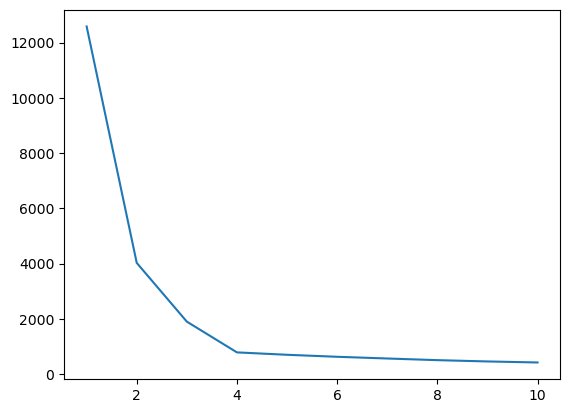

In [17]:
fig, ax = plt.subplots()
ax.plot(range(1,11),SSE)

<hr>

### The silhouette coefficient
- A measure of cluster cohesion and separation
- It quantifies how well a data point fits into its assigned cluster based on two factors:
    - How much the data point is to other points in the cluster
    - How far away the data point is from points in other cluster

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_coeff = []

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(data)
    silhouette_coeff.append(silhouette_score(data,model.labels_))

In [20]:
silhouette_coeff

[0.6097567047927545,
 0.5762648802117093,
 0.6564157034086995,
 0.5590953959445336,
 0.4645118304093731,
 0.3974800425375906,
 0.3167164221278599,
 0.33427529363178815,
 0.33795584472339174]

**Plot the result**

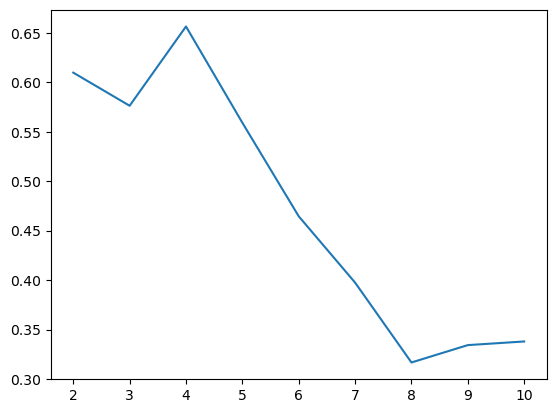

In [21]:
fig, ax = plt.subplots()
ax.plot(range(2,11),silhouette_coeff)